In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! nvidia-smi

Sun Sep  4 08:04:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W /  70W |   1012MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 6.2 MB/s 
     |████████████████████████████████| 52 kB 715 kB/s 
     |████████████████████████████████| 251 kB 67.0 MB/s 


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from pytz import timezone
from pykrx import stock
import glob, os
import numpy as np
import math
import numpy as np
import pandas as pd
import os, glob
from pykrx import stock as pystock
import matplotlib.pyplot as plt

In [ ]:
def update_data():
    
    time_now = datetime.now(tz=timezone('Asia/Seoul'))
    time_now_str = time_now.strftime(format='%Y%m%d')

    time_start = time_now - timedelta(days=365*5)       #5년전부터 가져오기
    time_start_str = time_start.strftime(format='%Y%m%d')


    data_dir = os.path.join('/content/drive/MyDrive/stockdata')

    print(f"{time_now_str} - Updating Stock Info...")

    market_cap =  ['000270','000660','000810','003490','003550','003670','005380',
                '005490','005930','005935','006400','009150','009830','010130',
                '010950','011070','011200','012330','015760','017670','018260',
                '024110','028260','030200','032830','033780','034020','034730',
                '035420','035720','036570','051900','051910','055550','066570',
                '068270','086790','090430','096770','105560','207940','259960',
                '302440','316140','323410','329180','352820','361610','373220','377300']
    


    for ticker in market_cap:
        ticker_dir = os.path.join(data_dir , f"{ticker}")

        
        try:                                        #회사 폴더 없으면 생성
            os.mkdir(ticker_dir)       
        except:                                     #있으면 말고
            pass

        data = stock.get_market_ohlcv_by_date(fromdate=time_start_str, todate=time_now_str, ticker=ticker)
        data.to_csv(f"{ticker_dir}/{ticker}.csv", encoding='cp949')

In [ ]:
update_data()

20220904 - Updating Stock Info...


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/stockdata/000660/000660.csv", encoding='cp949')

In [ ]:
data.head()

,날짜,시가,고가,저가,종가,거래량
0,2017-09-05,68600,70100,67900,69900,4026248
1,2017-09-06,69900,71900,69700,71700,4476200
2,2017-09-07,71600,72800,71200,71400,3877849
3,2017-09-08,72000,72800,71500,72600,2868673
4,2017-09-11,73600,74200,73200,73800,3321612


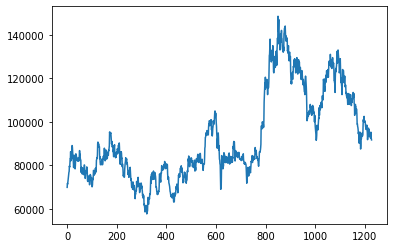

In [ ]:
plt.plot(data["종가"])

In [ ]:
market_cap =  ['000270','000660','000810','003490','003550','003670','005380',
                '005490','005930','005935','006400','009150','009830','010130',
                '010950','011070','011200','012330','015760','017670','018260',
                '024110','028260','030200','032830','033780','034020','034730',
                '035420','035720','036570','051900','051910','055550','066570',
                '068270','086790','090430','096770','105560','207940','259960',
                '302440','316140','323410','329180','352820','361610','373220','377300']

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn
from torch.autograd import Variable 

import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

1228
982
Training Shape (982, 4) (982, 1)
Testing Shape (246, 4) (246, 1)
Training Shape torch.Size([982, 1, 4]) torch.Size([982, 1])
Testing Shape torch.Size([246, 1, 4]) torch.Size([246, 1])
Tesla T4
Epoch: 0, loss: 0.89614
Epoch: 100, loss: 0.87343
Epoch: 200, loss: 0.85273
Epoch: 300, loss: 0.83390
Epoch: 400, loss: 0.81679
Epoch: 500, loss: 0.80124
Epoch: 600, loss: 0.78714
Epoch: 700, loss: 0.77434
Epoch: 800, loss: 0.76276
Epoch: 900, loss: 0.75227
Epoch: 1000, loss: 0.74278
Epoch: 1100, loss: 0.73419
Epoch: 1200, loss: 0.72639
Epoch: 1300, loss: 0.71930
Epoch: 1400, loss: 0.71282
Epoch: 1500, loss: 0.70688
Epoch: 1600, loss: 0.70139
Epoch: 1700, loss: 0.69629
Epoch: 1800, loss: 0.69151
Epoch: 1900, loss: 0.68698
Epoch: 2000, loss: 0.68266
Epoch: 2100, loss: 0.67848
Epoch: 2200, loss: 0.67442
Epoch: 2300, loss: 0.67044
Epoch: 2400, loss: 0.66650
Epoch: 2500, loss: 0.66258
Epoch: 2600, loss: 0.65866
Epoch: 2700, loss: 0.65471
Epoch: 2800, loss: 0.65071
Epoch: 2900, loss: 0.64667


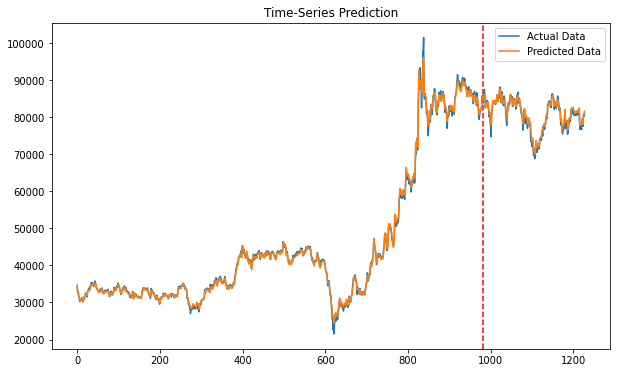

In [ ]:
data_dir = os.path.join('/content/drive/MyDrive/stockdata')
for media in market_cap:
    media_dir = os.path.join(data_dir , f"{media}")
    df = pd.read_csv(f"{media_dir}/{media}.csv", encoding='cp949')
    X = df.drop(columns=['날짜','거래량'])
    y = df.iloc[:, 4]
    y = np.array(y).reshape(-1,1)

    minmax = MinMaxScaler()
    standard = StandardScaler()

    X_mm = minmax.fit_transform(X)
    y_ss = standard.fit_transform(y) 

    length = len(X)
    trainlength = int(0.8*length)
    print(length)
    print(trainlength)
    
    X_train = X_mm[:trainlength, :]
    X_test = X_mm[trainlength:, :]
    y_train = y_ss[:trainlength, :]
    y_test = y_ss[trainlength:, :] 

    print("Training Shape", X_train.shape, y_train.shape)
    print("Testing Shape", X_test.shape, y_test.shape) 

    X_train_tensors = Variable(torch.Tensor(X_train))
    X_test_tensors = Variable(torch.Tensor(X_test))

    y_train_tensors = Variable(torch.Tensor(y_train))
    y_test_tensors = Variable(torch.Tensor(y_test))

    X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
    X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

    print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
    print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # device
    print(torch.cuda.get_device_name(0))

    num_epochs = 30000 #1000 epochs
    learning_rate = 0.00001 #0.001 lr

    input_size = 4 #number of features
    hidden_size = 2 #number of features in hidden state
    num_layers = 1 #number of stacked lstm layers

    num_classes = 1 #number of output classes 

    lstm = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]).to(device)

    loss_function = torch.nn.MSELoss()    # mean-squared error for regression
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)  # adam optimizer


    for epoch in range(num_epochs):
        outputs = lstm.forward(X_train_tensors_final.to(device)) #forward pass
        optimizer.zero_grad() #caluclate the gradient, manually setting to 0
      
        # obtain the loss function
        loss = loss_function(outputs, y_train_tensors.to(device))

        loss.backward() #calculates the loss of the loss function
      
        optimizer.step() #improve from loss, i.e backprop
        if epoch % 100 == 0:
          print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 


    df_X_ss = minmax.transform(df.drop(columns=['거래량','날짜']))
    df_y_mm = standard.transform(np.array(df.iloc[:, 4]).reshape(-1,1))

    df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
    df_y_mm = Variable(torch.Tensor(df_y_mm))
    #reshaping the dataset
    df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1]))

    train_predict = lstm(df_X_ss.to(device))#forward pass

    data_predict = train_predict.data.detach().cpu().numpy() #numpy conversion
    dataY_plot = df_y_mm.data.numpy()

    data_predict = standard.inverse_transform(data_predict) #reverse transformation
    dataY_plot = standard.inverse_transform(dataY_plot)
    plt.figure(figsize=(10,6)) #plotting
    plt.axvline(x=trainlength, c='r', linestyle='--') #size of the training set

    plt.plot(dataY_plot, label='Actual Data') #actual plot
    plt.plot(data_predict, label='Predicted Data') #predicted plot
    plt.title('Time-Series Prediction')
    plt.legend()
    plt.savefig(f'{media_dir}/{media}.png')
    plt.show() 
    break


In [ ]:
class LSTM(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
    super(LSTM, self).__init__()
    self.num_classes = num_classes #number of classes
    self.num_layers = num_layers #number of layers
    self.input_size = input_size #input size
    self.hidden_size = hidden_size #hidden state
    self.seq_length = seq_length #sequence length
 
    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                      num_layers=num_layers, batch_first=True) #lstm
    self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
    self.fc = nn.Linear(128, num_classes) #fully connected last layer

    self.relu = nn.ReLU() 

  def forward(self,x):
    h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #hidden state
    c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #internal state   
    # Propagate input through LSTM

    output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
   
    hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
    out = self.relu(hn)
    out = self.fc_1(out) #first Dense
    out = self.relu(out) #relu
    out = self.fc(out) #Final Output
   
    return out 

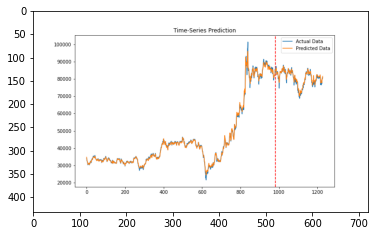

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread('/content/drive/MyDrive/stockdata/000270/000270.png')
plt.imshow(image)
plt.show()